<a href="https://colab.research.google.com/github/MiklRov/Yandex_practicum/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_'%D0%9D%D0%B5%D0%BD%D1%83%D0%B6%D0%BD%D1%8B%D0%B5_%D0%B2%D0%B5%D1%89%D0%B8'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Выпускной проект. Кластеризация пользователей мобильного приложения "Ненужные вещи"

### Описание проекта
Дерзкая и амбициозная команда сервиса «Ненужные вещи» жаждет увидеть в своём составе крутого аналитика, который возьмёт огромное количество наших данных и сотворит из них чудо. Конкретнее про чудо: наши пользователи совершают много действий в приложении, и мы уверены, что в этих данных есть инсайты, которые позволят нам стать лучшим приложением для продажи ненужных вещей. В рамках работы необходимо проанализировать поведение пользователей в мобильном приложениии "Ненужные вещи" и сегментировать их на разные группы для того, чтобы наладить более точный механизм взаимодействия с пользователями и повысить вовлеченность групп пользователей с низкими показателями.

### Материалы
- Дашборд - https://public.tableau.com/profile/sokolymba#!/vizhome/YandexPraktikum/sheet2?publish=yes

---

### <a id="stepend"> Оглавление</a>

- [Импорт библиотек, данных и получение первичной информации](#step1)
- [Предобработка данных](#step2)
- [Исследовательский анализ данных](#step3)
- [Кластеризация пользователей](#step4)
- [Проверка статистических гипотез](#step5)
- [Общий вывод и рекомендации](#step6)

---

### План исследования
- Загрузить данные и получить первичное представление о структуре и наполнении.

---

- Исследовать и обработать дубликаты;
- Исследовать и заменить пропущенные значения;
- В тех случаях, где необходимо, привести данные к соответствующим типам;
- Если необходимо, то изменить и привести названия столбцов к нижнему регистру;
- Объединить события show_contacts и contacts_show;
- Объединить события search_1 - search_7;
- Выделить из столбца с датой необходимые временные промежутки.

---

- Определить, сколько всего пользователей воспользовались приложением;
- Определить, сколько пользователей приносят нам наши источники;
- Построить график распределения событий по дням за исследуемый период;
- Построить график распредления событий по дням с разбивкой по источникам;
- Посчитать конверсию пользователей в целевое событие - просмотр контактов;
- Определить время начала и конца события для каждого пользователя в приложении;
- Сформировать таблицу с признаками, необходимыми для кластеризации;
- Произвести рассчет показателей: продолжительность каждого сеанса пользователя, количество совершения пользователем целевого действия, определить количество просмотров рекомендованных объявлений и добавлений объявления в избранное, посчитать общее время использования приложения для каждого пользователя;
- Построить графики распределения признаков и написать вывод;
- Построить матрицу корреляции признаков и написать вывод;
- На основании получившихся признаков разобить пользователей на группы при помощи ML;
- Построить графики распределения признаков для кластеров и описать получившиеся кластеры.

---

- Проверить гипотезу: Конверсия в просмотр контактов между пользователями, установившими приложение по ссылке из yandex и пользователями, установившими приложение по ссылке из google, различается;
- Проверить гипотезу: Конверсия в добавление объявления в избранное между пользователями, установшими приложение по ссылке из yandex, отличается от конверсии пользователей, установивших приложение по ссылке из google.

---

- Написать общий вывод и подготовить рекомендации для маркетологов по увеличению показателя вовлеченности пользователей в приложение;
- Подготовить презентацию с результатами исследования;
- Подготовить дашборд в Tableau.

### <a id='step1'>Импорт библиотек, данных и получение первичной информации</a>

In [ ]:
# импортируем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import math as mth
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [ ]:
# отключим предупреждения об ошибках
warnings.filterwarnings('ignore')

In [ ]:
# seabron-style
sns.set_style('whitegrid')

In [ ]:
# импортируем датасет data
data = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv', sep = ',')

In [ ]:
# импортируем датасет sources
sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv', sep = ',')

In [ ]:
# первичное представление о данных 
for df in [data, sources]:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [ ]:
# проверим на пропуски
for df in [data, sources]:
    print(df.isna().sum())

userId    0
source    0
dtype: int64
event.time    0
event.name    0
user.id       0
dtype: int64


In [ ]:
# проверим на дубликаты
for df in [data, sources]:
    print(df.duplicated().sum())

0
0


In [ ]:
# первые 5 строк
for df in [data, sources]:
    display(df.head())

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


### <a id='step2'>Предобработка данных</a>

In [ ]:
# изменим названия столбцов data
data.columns = ['user_id', 'source']

In [ ]:
data.head()

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [ ]:
# изменим названия столбцов sources
sources.columns = ['event_time', 'event_name', 'user_id']

In [ ]:
sources.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [ ]:
# приведем столбец event_time датасета data к формату даты и округлим данные до 1 секунды
sources['event_time'] = pd.to_datetime(sources['event_time'], format='%Y.%m.%d %H:%M:%S').dt.round('1S')

In [ ]:
sources.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [ ]:
# проверим количество пользователей в data
len(data['user_id'].unique())

4293

In [ ]:
# проверим количество пользователей в sources
len(sources['user_id'].unique())

4293

#### Количество пользователей в обоих датасетах совпадает, можно склеить их в один.

In [ ]:
# объединим data и sources
df = data.merge(sources, on='user_id', how = 'right')

In [ ]:
df.head()

,user_id,source,event_time,event_name
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00,advert_open
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01,tips_show
2,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:02,tips_show
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07,tips_show
4,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:56,advert_open


In [ ]:
# выделим из столбцов с датоами час, неделю, месяц, год и полную дату в отдельные столбцы

# час
df['event_hour'] = df['event_time'].dt.hour

# неделя
df['event_week'] = df['event_time'].astype('datetime64[W]')

# месяц
df['event_month'] = df['event_time'].astype('datetime64[M]')

# год
df['event_year'] = df['event_time'].astype('datetime64[Y]')

# полная дата
df['event_date'] = df['event_time'].astype('datetime64[D]')

In [ ]:
# первые 5 строк
df.head()

,user_id,source,event_time,event_name,event_hour,event_week,event_month,event_year,event_date
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00,advert_open,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01,tips_show,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07
2,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:02,tips_show,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07,tips_show,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07
4,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:56,advert_open,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07


#### Так как события contacts_show и show_contacts обозначают одно и то же событие - пользователь нажал на кнопку "Показать номер телефона", то можно склеить их в одно. Аналогично можно поступить с событиями search_n, т.к в нашем исследовании неважно, что именно ищут пользователи.

In [ ]:
# объединим события contacts_show и show_contacts, а также seacrh_n

# функция для замены
def events_type(i):
    if i == 'show_contacts':
        new_name = 'contacts_show'
        return new_name
    elif 'search' in i:
        new_name = 'search'
        return new_name
    return i

# применим фукнцию
df['event_name'] = df['event_name'].apply(events_type)

In [ ]:
# проверим
df['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search',
       'tips_click', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

In [ ]:
df.head()

,user_id,source,event_time,event_name,event_hour,event_week,event_month,event_year,event_date
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00,advert_open,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01,tips_show,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07
2,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:02,tips_show,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07,tips_show,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07
4,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:56,advert_open,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07


### <a id='step3'>Исследовательский анализ данных</a>

In [ ]:
# посчитаем количество пользователей, пришедших из каждого источников
df.groupby('source').agg({'user_id' : 'nunique'})

,user_id
source,
google,1129
other,1230
yandex,1934


In [ ]:
# посчитаем, сколько раз было совершено каждое действие
df.groupby('event_name').agg({'user_id' : 'count'}).sort_values(by='user_id', ascending=False)

,user_id
event_name,
tips_show,40055
photos_show,10012
search,6784
advert_open,6164
contacts_show,4529
map,3881
favorites_add,1417
tips_click,814
contacts_call,541


In [ ]:
# посмотрим, за какой период у нас есть данные
print(f'В логе представлены события за период с {df["event_date"].min().date()} по {df["event_date"].max().date()}')

В логе представлены события за период с 2019-10-07 по 2019-11-03


In [ ]:
# посчитаем количество событий по дням для каждого пользователя
events_by_day = df.groupby('event_date', as_index=False).agg({'user_id':'count'})

In [ ]:
events_by_day.head()

,event_date,user_id
0,2019-10-07,2545
1,2019-10-08,2499
2,2019-10-09,2027
3,2019-10-10,2243
4,2019-10-11,2030


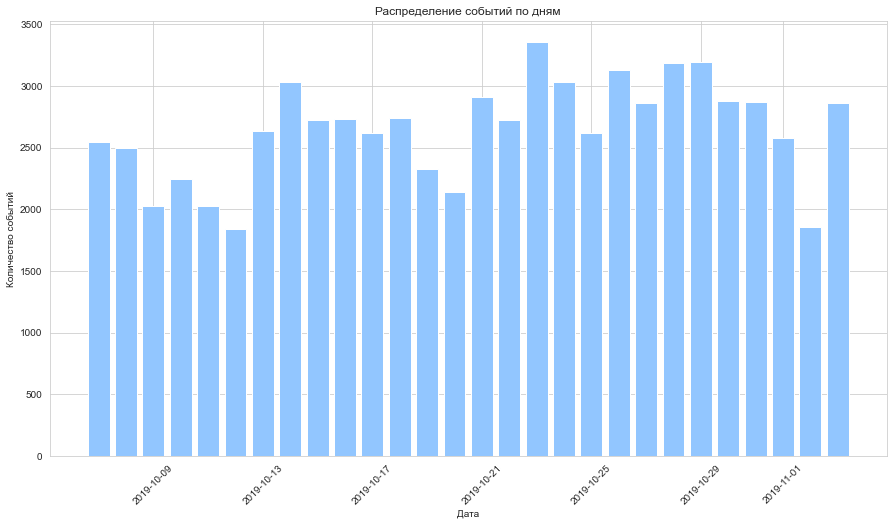

In [ ]:
# нарисуем график распределения событий по дням
plt.figure(figsize=(15, 8))
with plt.style.context('seaborn-pastel'):
    plt.bar(events_by_day['event_date'], events_by_day['user_id'])
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение событий по дням')
plt.xticks(rotation=45)
plt.grid(True)
plt.show();

- Нам доступны данные за период с 07.10.2019 по 03.11.2019;
- Условно данные можно разбить на несколько небольших периодов: 1 неделя - с 07.10.2019 по 12.10.2019, 2 неделя - с 13.10.2019 по 20.10.2019, 3 неделя - с 21.10.2019 по 27.10.2019, 4 неделя - с 28.10.2019 по 03.11.2019; 
- Больше всего событий совершено 23.10.2019 - ~ 3500;
- Меньше всего событий совершено 12.12.2019 - ~ 2000;
- Наименьшее количество событий и самые заметные просадки происходят в выходные дни - 12.10.2019 и 02.11.2019 - оба эти дня приходятся на субботу. Однако стоит отметить, что в последние выходные дни октября активность больше, чем в остальные выходные. Скорее всего, это может быть связано с получением пользователями зарплаты или премии, и желанием приобрести новые вещи.
- В целом, данные распределены равномерно. Нет аномалий.

In [ ]:
df.groupby(['source'],as_index=False).agg({'user_id':'count'})

,source,user_id
0,google,20445
1,other,19466
2,yandex,34286


In [ ]:
# количество событий по каждому источнику вынесем в отидельные датасеты

yandex_by_day = df.query('source == "yandex"')\
.groupby('event_date', as_index=False).agg({'user_id':'count'})

google_by_day = df.query('source == "google"')\
.groupby('event_date', as_index=False).agg({'user_id':'count'})

other_by_day = df.query('source == "other"')\
.groupby('event_date', as_index=False).agg({'user_id':'count'})

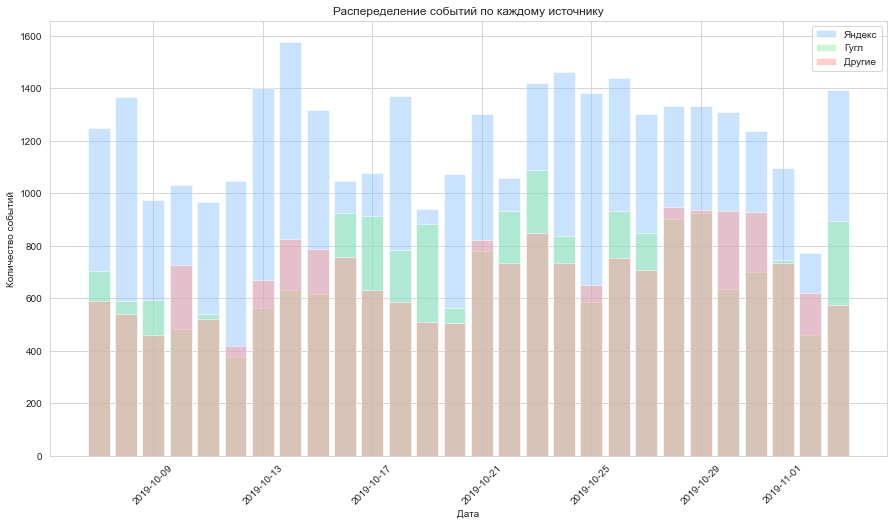

In [ ]:
# нарисуем график распределения количества событий по дням для каждого источника
plt.figure(figsize=(15, 8))
with plt.style.context('seaborn-pastel'):
    plt.bar(yandex_by_day['event_date'], yandex_by_day['user_id'], alpha=.5)
    plt.bar(google_by_day['event_date'], google_by_day['user_id'], alpha=.5)
    plt.bar(other_by_day['event_date'], other_by_day['user_id'], alpha=.5)
plt.title('Распеределение событий по каждому источнику')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.legend(['Яндекс', 'Гугл', 'Другие'])
plt.xticks(rotation=45)
plt.show();

- Больше всего событий совершают пользователи, пришедшие через Яндекс;
- В основном, распределение данные полностью повторяет общий график без разбивки по источникам.

In [ ]:
import calendar

In [ ]:
# добавим в датасет информацию с текстовой датой совершения событий
df['week_day'] = df['event_date'].apply(lambda x: calendar.day_name[x.weekday()])

In [ ]:
# посчиатем, сколько событий происходит с разбивкой по дням недели
events_per_week = df.groupby('week_day', as_index=False).agg({'event_time':'count'}).sort_values(by='event_time', ascending=False)

events_per_week

,week_day,event_time
1,Monday,11671
5,Tuesday,11145
6,Wednesday,10994
4,Thursday,10763
3,Sunday,10501
0,Friday,9969
2,Saturday,9154


In [ ]:
# нарисуем график с количеством событий по дням недели
plt.figure(figsize=(15, 8))
with plt.style.context('seaborn-pastel'):
    plt.bar(events_per_week['week_day'], events_per_week['event_time'], alpha=.5)
plt.title('Распеределение событий по каждому источнику')
plt.xlabel('День недели')
plt.ylabel('Количество событий')
plt.legend(['Яндекс', 'Гугл', 'Другие'])
plt.xticks(rotation=45)
plt.show();

- Больше всего событий происходит по понедельникам;
- Меньше всего событий происходит по субботам;

In [ ]:
# посчитаем количество событий на одного пользователя
events_per_user = (df\
                   .groupby(['user_id'], as_index=False)\
                   .agg({'event_time':'count'})\
                   .rename(columns={'event_time':'event_count'}))

In [ ]:
events_per_user.head()

,user_id,event_count
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,35
1,00157779-810c-4498-9e05-a1e9e3cedf93,71
2,00463033-5717-4bf1-91b4-09183923b9df,10
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,32
4,00551e79-152e-4441-9cf7-565d7eb04090,8


In [ ]:
# выведем минимум событий на одного пользователя
print('Минимум событий на одного пользователя:', events_per_user['event_count'].min())

Минимум событий на одного пользователя: 1


In [ ]:
# выведем максимум событий на одного пользователя
print('Максимум событий на одного пользователя:', events_per_user['event_count'].max())

Максимум событий на одного пользователя: 478


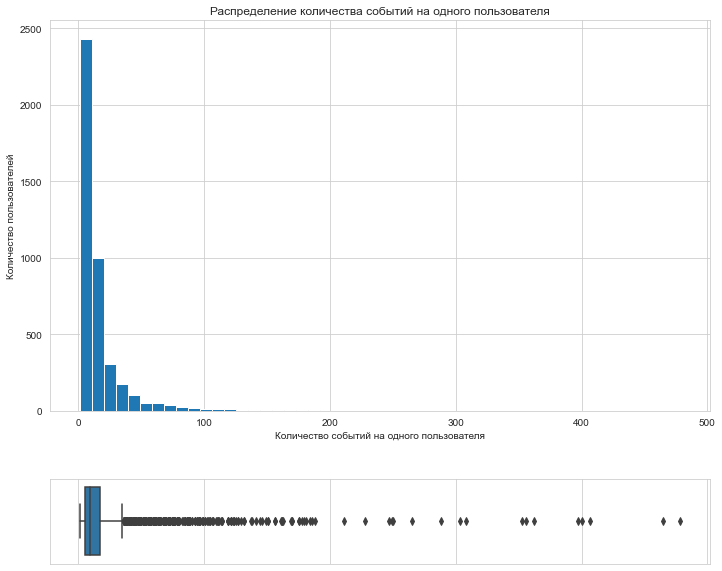

In [ ]:
# нарисуем график распределения количества событий на пользователя
fig = plt.figure(figsize=(16, 10))
grid = plt.GridSpec(4, 4, hspace=0.8)

# оси для графиков
ax_main = fig.add_subplot(grid[:-1, :-1])
plt.grid(True)

ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[])
plt.grid(True)

# снчала будет гистограмма
ax_main.hist(events_per_user['event_count'], bins=50)

# потом боксплот
sns.boxplot(events_per_user['event_count'], ax=ax_bottom, orient='h')
ax_bottom.set(xlabel='')

ax_main.set(title='Распределение количества событий на одного пользователя',\
            xlabel='Количество событий на одного пользователя',\
            ylabel='Количество пользователей')

plt.show();

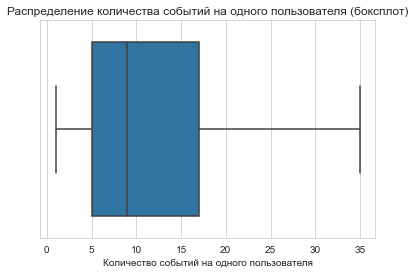

In [ ]:
# масштабируем боксплот
sns.boxplot(events_per_user['event_count'], showfliers=False)
plt.title('Распределение количества событий на одного пользователя (боксплот)')
plt.xlabel('Количество событий на одного пользователя')
plt.ylabel('')
plt.show();

- В распределении количества событий на пользователя есть выбросы. В основном, каждый пользователь совершает от 5 до 12 событий. Все, что лежит дальше - примем за аномальные значения.

In [ ]:
# на всякий случай, проверим среднее и медиану
print('Количество событий на одного пользователя:\n')
print('Среднее: {:.1f}'.format(events_per_user['event_count'].mean()))
print('Медиана: {:.1f}'.format(events_per_user['event_count'].median()))

Количество событий на одного пользователя:

Среднее: 17.3
Медиана: 9.0


In [ ]:
# удалим аномальные значения через срез по правому перцентилю
right_cut = events_per_user.event_count.quantile(0.95)
events_per_user_filtered = events_per_user.query('event_count <= @right_cut')

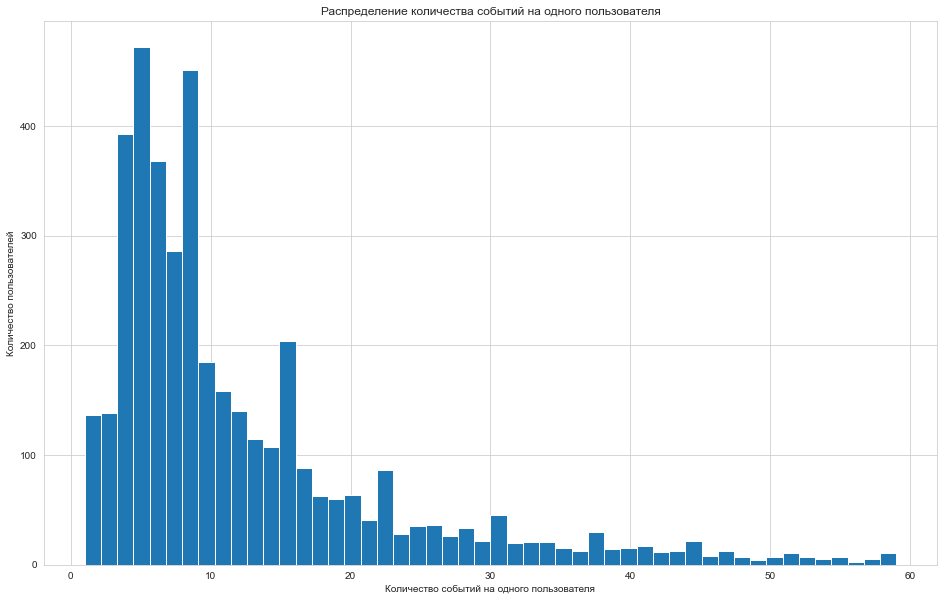

In [ ]:
# нарисуем график распределения количества событий на пользователя по очищенным данным
plt.figure(figsize=(16, 10))
events_per_user_filtered['event_count'].hist(bins=50)
plt.title('Распределение количества событий на одного пользователя')
plt.xlabel('Количество событий на одного пользователя')
plt.ylabel('Количество пользователей')
plt.show();

In [ ]:
# посчитаем среднее и медиану по очищенным данным
print('Количество событий на одного пользователя (очищенные данные):\n')
print('Среднее: {:.1f}'.format(events_per_user_filtered['event_count'].mean()))
print('Медиана: {:.1f}'.format(events_per_user_filtered['event_count'].median()))

Количество событий на одного пользователя (очищенные данные):

Среднее: 12.4
Медиана: 8.0


#### По-хорошему, аномальные значения можно было бы удалить, но так мы потеряем почти 20% всех данных, поэтому оставим как есть.

#### Посчитаем продолжительность сеанса каждого пользователя в приложении.

In [ ]:
# определим начало и конец каждого сеанса каждого пользователя в приложении

# начало сеанса
user_time_min = df.groupby(['user_id', 'event_date', 'event_hour'], as_index=False)\
.agg({'event_time':'min'})\
.rename(columns={'event_time':'event_time_start'})

# конец сеанса
user_time_max = df.groupby(['user_id', 'event_date', 'event_hour'], as_index=False)\
.agg({'event_time':'max'})\
.rename(columns={'event_time':'event_time_stop'})

In [ ]:
# объединим столбцы с временем начала и окончания сеанса для пользователей
user_time =  pd.merge(user_time_min, user_time_max, on=['user_id', 'event_date', 'event_hour'])

In [ ]:
# посчитаем, cколько длился сеанс и переведем в минуты
user_time['time_spent'] = (user_time['event_time_stop'] - user_time['event_time_start'])\
.astype('timedelta64[s]') / 60

In [ ]:
# проверим
user_time.head()

,user_id,event_date,event_hour,event_time_start,event_time_stop,time_spent
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,13,2019-10-07 13:39:46,2019-10-07 13:49:42,9.933333
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,18,2019-10-09 18:33:56,2019-10-09 18:42:23,8.450000
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,19,2019-10-21 19:52:31,2019-10-21 19:57:49,5.300000
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,20,2019-10-21 20:00:00,2019-10-21 20:07:30,7.500000
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,11,2019-10-22 11:18:15,2019-10-22 11:30:53,12.633333


In [ ]:
# округлим time_spent
user_time['time_spent'] = round(user_time['time_spent'], 1)

In [ ]:
user_time.head()

,user_id,event_date,event_hour,event_time_start,event_time_stop,time_spent
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,13,2019-10-07 13:39:46,2019-10-07 13:49:42,9.9
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,18,2019-10-09 18:33:56,2019-10-09 18:42:23,8.4
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,19,2019-10-21 19:52:31,2019-10-21 19:57:49,5.3
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,20,2019-10-21 20:00:00,2019-10-21 20:07:30,7.5
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,11,2019-10-22 11:18:15,2019-10-22 11:30:53,12.6


#### Сформируем таблицу с признаками для кластеризации пользователей.

In [ ]:
# features - таблица с признаками\
# добавим в нее время продолжительности сеанса для каждого пользователя и \
# число сессий для каждого пользователя
features = user_time.groupby('user_id', as_index=False)\
.agg({'time_spent':'sum', 'event_date':'count'})\
.rename(columns={'event_date':'visits'})

In [ ]:
features.head()

,user_id,time_spent,visits
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,43.7,5
1,00157779-810c-4498-9e05-a1e9e3cedf93,177.8,10
2,00463033-5717-4bf1-91b4-09183923b9df,21.2,2
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,87.5,7
4,00551e79-152e-4441-9cf7-565d7eb04090,9.4,3


In [ ]:
# посчитаем, сколько раз пользователи совершили целевое действие - просмотр контактов
conversion = df.query('event_name=="contacts_show"')\
.groupby('user_id', as_index=False)\
.agg({'event_name':'count'})\
.rename(columns={'event_name':'conversions'})

In [ ]:
conversion.head()

,user_id,conversions
0,00157779-810c-4498-9e05-a1e9e3cedf93,11
1,00551e79-152e-4441-9cf7-565d7eb04090,3
2,005fbea5-2678-406f-88a6-fbe9787e2268,3
3,00753c79-ea81-4456-acd0-a47a23ca2fb9,1
4,007d031d-5018-4e02-b7ee-72a30609173f,2


In [ ]:
# добавим столбец conversions в датасет с признаками
features = pd.merge(features, conversion, on='user_id', how='left')

In [ ]:
# заменим пропуски нулями
features['conversions'] = features['conversions'].fillna(0)

In [ ]:
features.head()

,user_id,time_spent,visits,conversions
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,43.7,5,0.0
1,00157779-810c-4498-9e05-a1e9e3cedf93,177.8,10,11.0
2,00463033-5717-4bf1-91b4-09183923b9df,21.2,2,0.0
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,87.5,7,0.0
4,00551e79-152e-4441-9cf7-565d7eb04090,9.4,3,3.0


#### События tips_click и favorites_add примем за метрики вовлеченности пользователей в приложение.

In [ ]:
# посчитаем, сколько раз пользователи просмотрели рекомендованные объявления и сколько раз добавили объявления в избранное

# промотр рекомендованного объявления
tips = df.query('event_name=="tips_click"')\
.groupby('user_id', as_index=False)\
.agg({'event_name':'count'})\
.rename(columns={'event_name':'tips'})

# добавление в избранное 
favorites = df.query('event_name=="favorites_add"')\
.groupby('user_id', as_index=False)\
.agg({'event_name':'count'})\
.rename(columns={'event_name':'favorites'})

In [ ]:
# добавим столбцы с метриками в датасет

# просмотры
features = pd.merge(features, tips, on=['user_id'], how='left')

# добавления в избранное
features = pd.merge(features, favorites, on=['user_id'], how='left')

In [ ]:
# заменим пропуски нулями
features[['tips', 'favorites']] = features[['tips', 'favorites']].fillna(0)

In [ ]:
features.head()

,user_id,time_spent,visits,conversions,tips,favorites
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,43.7,5,0.0,0.0,0.0
1,00157779-810c-4498-9e05-a1e9e3cedf93,177.8,10,11.0,0.0,2.0
2,00463033-5717-4bf1-91b4-09183923b9df,21.2,2,0.0,0.0,0.0
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,87.5,7,0.0,0.0,0.0
4,00551e79-152e-4441-9cf7-565d7eb04090,9.4,3,3.0,0.0,0.0


#### Посчитаем суммарное время, проведенное каждым пользователем в приложении.

In [ ]:
# определим начало и конец сеанса каждого пользователя

# начало сеанса
user_start_time = df.groupby(['user_id'], as_index=False).agg({'event_time':'min'})
user_start_time = user_start_time.rename(columns={'event_time':'user_start_time'})

# конец сеанса
user_stop_time = df.groupby(['user_id'], as_index=False).agg({'event_time':'max'})
user_stop_time = user_stop_time.rename(columns={'event_time':'user_stop_time'})

In [ ]:
# объединим столбцы
total_user_time =  pd.merge(user_start_time, user_stop_time, on=['user_id'])

In [ ]:
# найдем суммарное время, проведенное каждым пользователем в приложении
total_user_time['total_time_spent'] = total_user_time['user_stop_time'] - total_user_time['user_start_time']

In [ ]:
# удалим ненужные столбцы 
total_user_time = total_user_time.drop(['user_start_time', 'user_stop_time'], axis=1)

In [ ]:
# переведем значения в минуты
total_user_time['total_time_spent'] = total_user_time['total_time_spent'].astype('timedelta64[s]') / 60

In [ ]:
# первые 5 строк
total_user_time.head()

,user_id,total_time_spent
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,21471.116667
1,00157779-810c-4498-9e05-a1e9e3cedf93,21337.600000
2,00463033-5717-4bf1-91b4-09183923b9df,24.716667
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,18688.166667
4,00551e79-152e-4441-9cf7-565d7eb04090,4892.516667


In [ ]:
# округлим total_time_spent
total_user_time['total_time_spent'] = round(total_user_time['total_time_spent'], 1)

In [ ]:
total_user_time.head()

,user_id,total_time_spent
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,21471.1
1,00157779-810c-4498-9e05-a1e9e3cedf93,21337.6
2,00463033-5717-4bf1-91b4-09183923b9df,24.7
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,18688.2
4,00551e79-152e-4441-9cf7-565d7eb04090,4892.5


In [ ]:
# добавим столбец total_time_spent в датасет с признаками
features = pd.merge(features, total_user_time, on='user_id', how='left')

In [ ]:
features.head()

,user_id,time_spent,visits,conversions,tips,favorites,total_time_spent
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,43.7,5,0.0,0.0,0.0,21471.1
1,00157779-810c-4498-9e05-a1e9e3cedf93,177.8,10,11.0,0.0,2.0,21337.6
2,00463033-5717-4bf1-91b4-09183923b9df,21.2,2,0.0,0.0,0.0,24.7
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,87.5,7,0.0,0.0,0.0,18688.2
4,00551e79-152e-4441-9cf7-565d7eb04090,9.4,3,3.0,0.0,0.0,4892.5


favorites
[0. 1. 9.]
conversions
[ 2.  5. 15.]
tips
[0. 1. 4.]
visits
[ 5.  8. 19.]


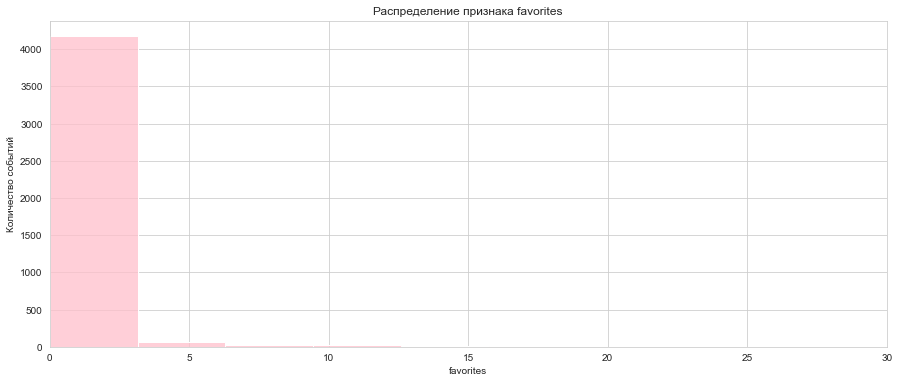

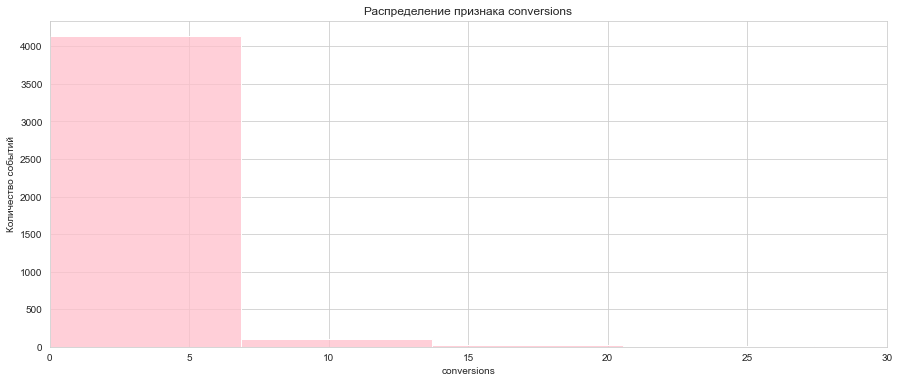

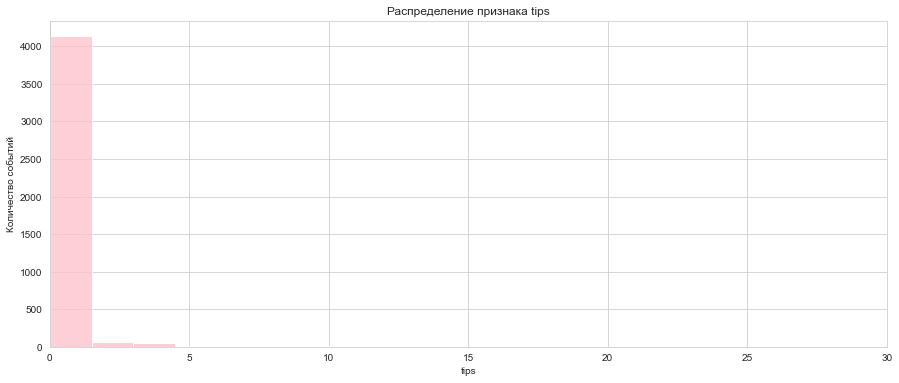

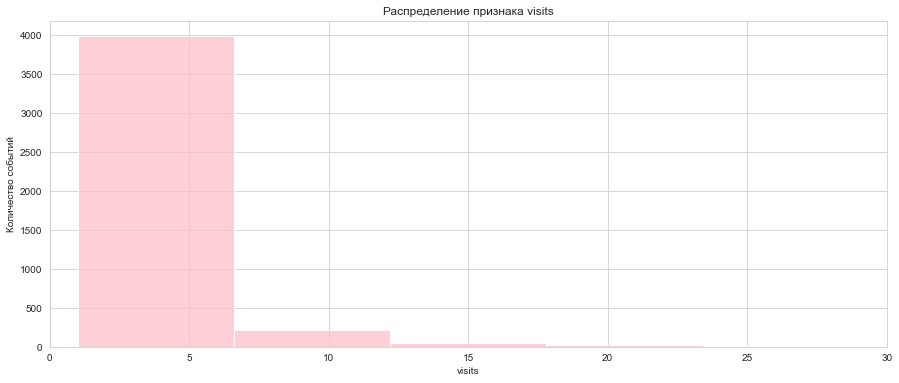

In [ ]:
# нарисуем графики распределения для каждого признака
for i in {'visits', 'conversions', 'tips', 'favorites'}:
    str = 'Распределение признака '+ i
    
    plt.figure(figsize=(15, 6))
    sns.histplot(features[i], bins=20, color='pink')
    plt.title(str)
    plt.ylabel('Количество событий')
    plt.xlim(0, 30)
    plt.show
    print(i)
    print(np.percentile(features[i], [90, 95, 99]));

- На каждого пользователя приходится от одной до 5 сессий;
- Пользователи крайне редко добавляют объявления в избранное;
- Пользователи крайне редко просматривают рекомендованные объявления;
- Большая часть пользователей не совершает целевое действие - просмотр контактов.

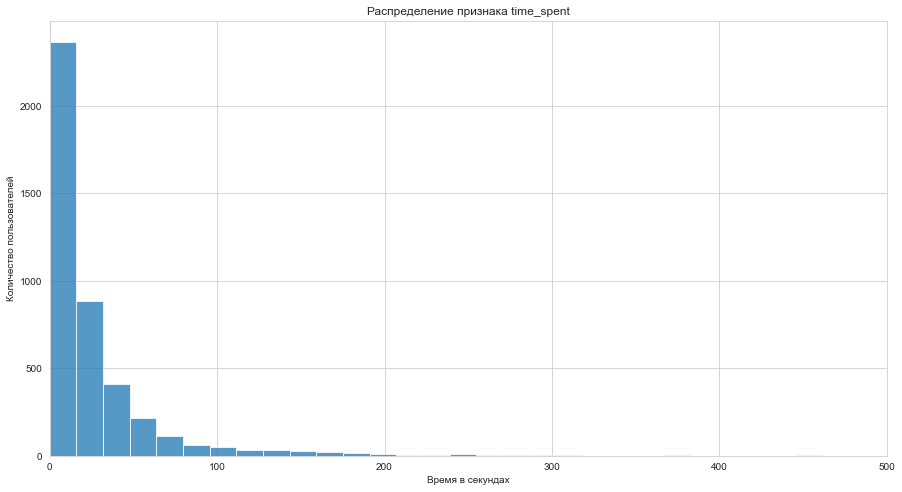

[ 62.2   102.3   241.336]


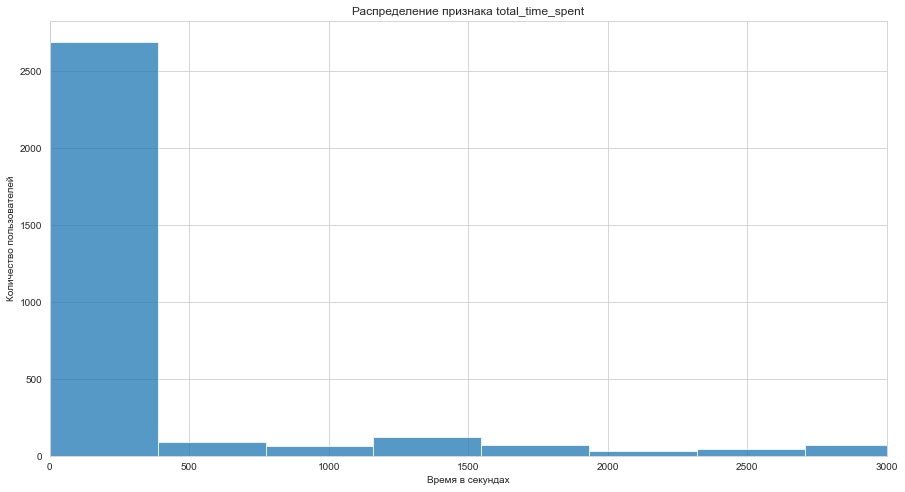

[14115.    21850.24  33106.252]


In [ ]:
# нарисуем графики распределений для значений "продолжительность события" и\
# суммарное время, проведенное пользователем в приложении

# продолжительность события
plt.figure(figsize=(15, 8))
sns.histplot(features['time_spent'], bins=100)
plt.title('Распределение признака time_spent')
plt.xlabel('Время в секундах')
plt.ylabel('Количество пользователей')
plt.xlim(0, 500)
plt.show()
print(np.percentile(features['time_spent'], [90, 95, 99]))

# суммарное время пользователя в приложении
plt.figure(figsize=(15, 8))
sns.histplot(features['total_time_spent'], bins=100)
plt.title('Распределение признака total_time_spent')
plt.xlabel('Время в секундах')
plt.ylabel('Количество пользователей')
plt.xlim(0, 3000)
plt.show()
print(np.percentile(features['total_time_spent'], [90, 95, 99]));

- В основном, сеансы пользователей быстро начинаются и быстро заканчиваются. Мало какие пользователи проводят в приложении больше 100 секунд;
- Общее время, проведенное пользователем в приложении, в основном не превышает 500 секунд. Есть те, кто проводит больше времени в приложении, но их меньшинство.
- В целом, очень высок процент пользователей, которые открывают и закрывают приложение, так и не успев толком им попользоваться.

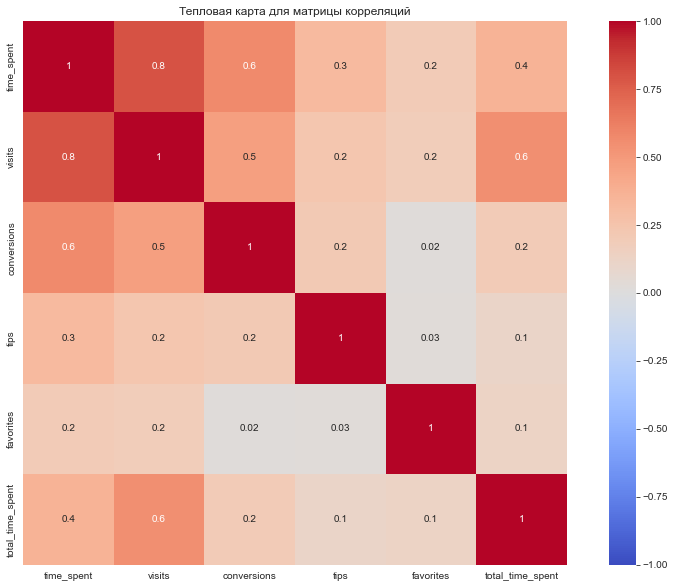

In [ ]:
# матрица корреляций для таблицы с признаками
cm = features.corr() 

# нарисуем тепловую карту для матрицы корреляций
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot = True, square = True,\
            vmin = -1, vmax = 1, center = 0, fmt='.1g', cmap= 'coolwarm')
plt.title('Тепловая карта для матрицы корреляций')
plt.show();

- Сильная положительная корреляция между time_spent и visits - 0.8. Очевидно, что чем чаще пользователи посещают наше приложении, тем больше времени они в нем проводят;
- Идентичная ситуация с переменными total_time_spent и visits - 0.6;
- Выраженная положительная корреляция между time_spent и conversions - 0.6. Чем дольше длится сеанс пользователя, тем больше пользователь "вовлекается" в приложение и совершает покупку;
- Выраженная положительная корреляция между visits и conversions - 0.5. Чем чаще пользователи заходят в приложение, тем с большей вероятностью они совершают покупку.

### <a id='step4'>Кластеризация пользователей</a>

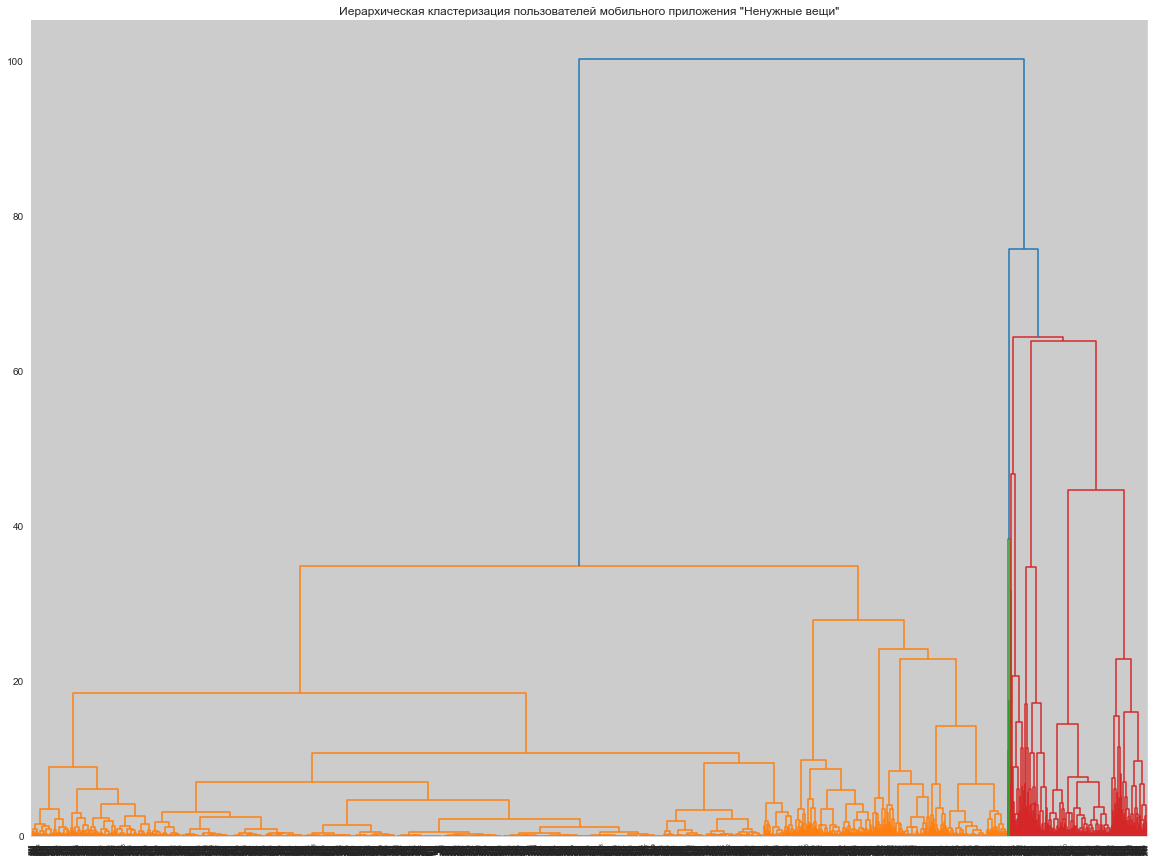

In [ ]:
# построим дендограмму

# отбросим ненужный столбец с id пользователей и целевую переменную, чтобы исключить подглядывание модели
X = features.drop(['user_id', 'conversions'], axis=1)

# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(20, 15))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация пользователей мобильного приложения "Ненужные вещи"')
plt.show();

#### Оптимальное количество кластеров - 3.

In [ ]:
# произведем кластеризацию

# обучим модель кластеризации через k-means
km = KMeans(n_clusters=3, random_state = 0)
labels = km.fit_predict(X_sc)

# сохраним кластеры в датасет с признаками
features['cluster_km'] = labels

In [ ]:
# проверим. что все получилось
features.head()

,user_id,time_spent,visits,conversions,tips,favorites,total_time_spent,cluster_km
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,43.7,5,0.0,0.0,0.0,21471.1,1
1,00157779-810c-4498-9e05-a1e9e3cedf93,177.8,10,11.0,0.0,2.0,21337.6,1
2,00463033-5717-4bf1-91b4-09183923b9df,21.2,2,0.0,0.0,0.0,24.7,0
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,87.5,7,0.0,0.0,0.0,18688.2,1
4,00551e79-152e-4441-9cf7-565d7eb04090,9.4,3,3.0,0.0,0.0,4892.5,0


In [ ]:
# посчитаем количество пользователей в каждом кластере
clusters_users = features.groupby('cluster_km', as_index=False)\
.count()[['cluster_km', 'user_id']]\
.rename(columns={'user_id': 'clusters_value'})

In [ ]:
# посчитаем процентное соотношение
clusters_users['pies'] = round((clusters_users['clusters_value'] / features['user_id'].nunique()) * 100, 2)

In [ ]:
# проверим
clusters_users.head()

,cluster_km,clusters_value,pies
0,0,3649,85.00
1,1,602,14.02
2,2,42,0.98


In [ ]:
# посчитаем средние значения для признаков
clusters_mean = features.groupby('cluster_km').mean()

In [ ]:
# добавим процентное соотношение
clusters_mean['pies'] = clusters_users['pies']

In [ ]:
# переведем time_spent в часы
clusters_mean['time_spent'] = round(clusters_mean['time_spent'] / 60, 2)

In [ ]:
# переведем total_time_spent в часы
clusters_mean['total_time_spent'] = round(clusters_mean['total_time_spent'] / 60, 2)

In [ ]:
# проверим
clusters_mean.head()

,time_spent,visits,conversions,tips,favorites,total_time_spent,pies
cluster_km,,,,,,,
0,0.32,1.949849,0.682653,0.102220,0.175116,18.98,85.00
1,1.03,6.837209,1.905316,0.473422,0.803987,310.66,14.02
2,6.71,28.547619,21.214286,3.714286,7.000000,361.62,0.98


- Самым большим получился первый кластер - в него попало 85% пользователей, однако по остальным метрикам у него значения хуже остальных кластеров. Среднее время продолжительности событий - 32 минуты, а суммарное время, проведенное в приложении 19 часов. Пользователи, попавшие в первый кластер, почти не просматривают рекомендованные объявления и также не добавляют объявления в избранное. Конверсия практически на нуле - 0.68%. В среднем, на одного пользователя приходится два посещения.

---

- Во второй кластер попало 14% пользователей. По всем метрикам он лучше первого кластера, но всегда есть, куда расти. Среднее время сеанса пользователя - 62 минуты, а суммарное время, проведенное пользователями в приложении - 310 часов. Пользователи в этом кластере охотнее добавляют объявления в избранные и просматривают рекомендованные. В среднем, на одного пользователя приходится 7 посещений.

---

- В третий кластер попал 1% пользователей, однако по всем метрикам он лучше, чем два предыдущий. Среднее время сеанса составило почти 7 часов, а суммарное время, проведенное пользователями в приложении - 360 часов. Конверсия в целевое действие - просмотр контактов - 21%. Также самые высокие значения добавления объявлений в избранное и просмотр рекомендованных объявлений. Очевидно, что самые активные пользователи собрались здесь.

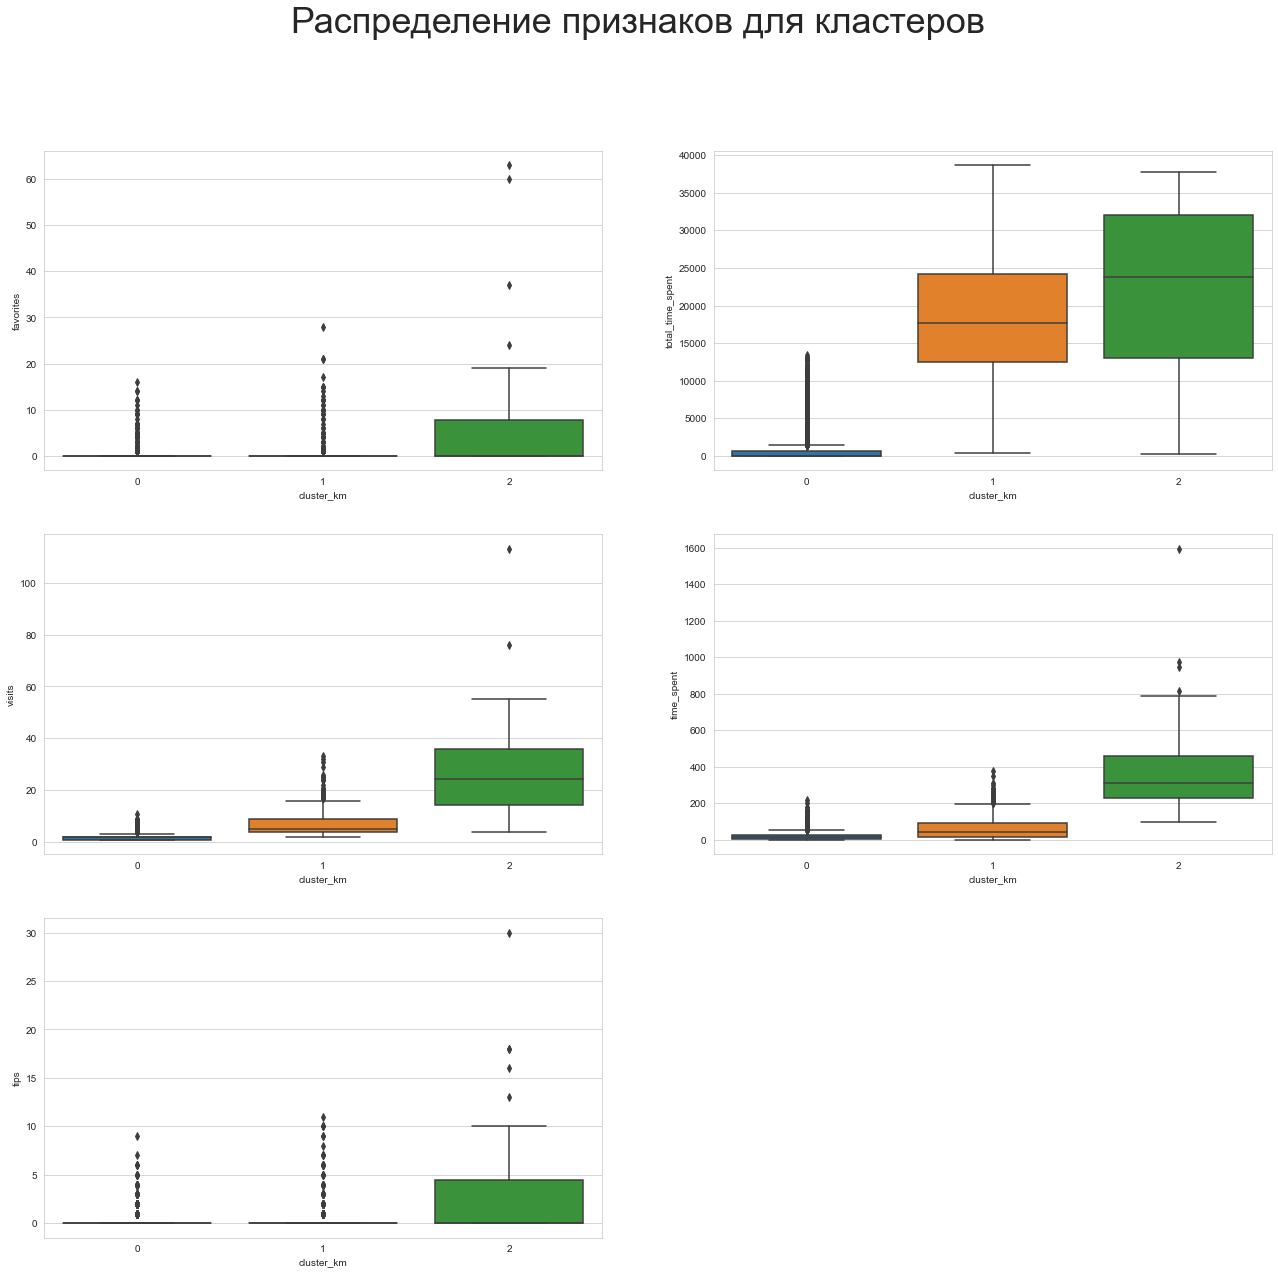

In [ ]:
# нарисуем графики распределения признаков для каждого кластера
count=1
plt.subplots(figsize=(22, 20))
for column in {'visits', 'total_time_spent', 'time_spent', 'tips', 'favorites'}:
    plt.suptitle('Распределение признаков для кластеров', fontsize=36)
    plt.subplot(3, 2, count)
    sns.boxplot(x='cluster_km', y=column,  data=features)
    count+=1

plt.show();

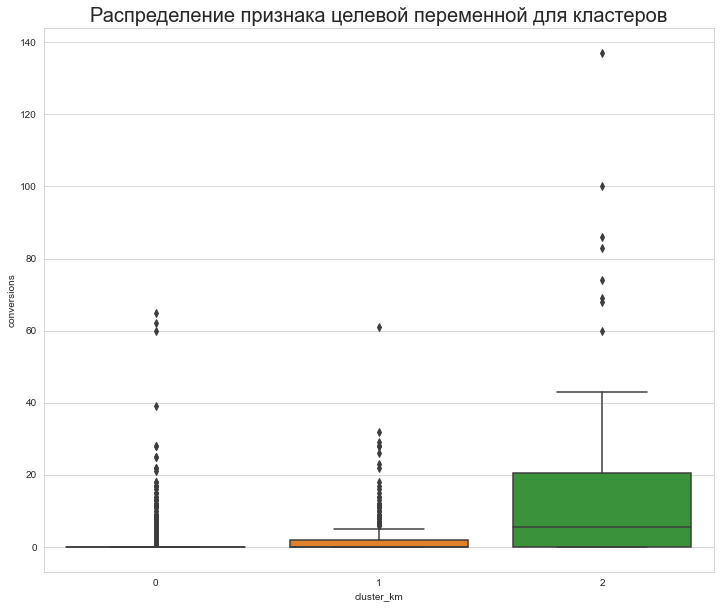

In [ ]:
# нарисуем график распределения целевой переменной
plt.figure(figsize=(12, 10))
sns.boxplot(x='cluster_km', y='conversions',  data=features)
plt.title('Распределение признака целевой переменной для кластеров', fontsize=20)
plt.show();

- В целом, графики распределения признаков подтверждают ранее сделанные выводы.

### <a id='step5'>Проверка статистических гипотез</a>

In [ ]:
# сформируем таблицу с общим количеством пользователей по источникам
total_users = sources.groupby('source', as_index=False)\
.count()\
.rename(columns={'user_id':'total_users'})

In [ ]:
total_users.head()

In [ ]:
# сформируем таблицу с пользователями, совершившими целевое действие - просмотр контактов
goal_users = data.query('event_name=="contacts_show"')\
.groupby(['source'], as_index=False)\
.agg({'user_id':'nunique'})\
.rename(columns={'user_id':'goal_users'})

In [ ]:
# объединим датасеты
conversion_users = pd.merge(goal_users, total_users, on='source')

In [ ]:
# рассчиатем CR
conversion_users['cr'] = round(conversion_users['goal_users'] / conversion_users['total_users'], 2)

In [ ]:
# проверим
conversion_users

In [ ]:
# сформируем таблицу с пользователями, добавившими объявление в избранное
fav_users = data.query('event_name=="favorites_add"')\
.groupby(['source'], as_index=False).agg({'user_id':'nunique'})\
.rename(columns={'user_id':'favorites_users'})

In [ ]:
# объединим датасеты
fav_users_1 = pd.merge(fav_users, total_users, on='source')

In [ ]:
# рассчитаем CR
fav_users_1['cr'] = round(fav_users_1['favorites_users'] / fav_users_1['total_users'], 2)

In [ ]:
# проверим
fav_users_1

#### Проведем проверку первый пары статистических гипотез.

#### H0 - Конверсия в просмотр контактов между пользователями, установшими приложение по ссылке из yandex и пользователями, установшими приложение по ссылке из google, одинаковая;
#### H1 - Конверсия в просмотр контактов между пользователями, установившими приложение по ссылке из yandex и пользователями, установившими приложение по ссылке из google, различается.

In [ ]:
alpha = .05 # критический уровень статистической значимости

purchases = np.array([275, 478])
leads = np.array([1129, 1934])

p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
z_value = (p1 - p2) / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))
distr = stats.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('z_value =', z_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

#### Проведем проверку второй пары статистических гипотез.

#### H0 - Конверсия в добавление объявления в избранное между пользователями, установившими приложение по ссылке из yandex не отличается от конверсии пользователей, установивших приложение по ссылке из google;
#### H1 - Конверсия в добавление объявления в избранное между пользователями, установшими приложение по ссылке из yandex отличается от конверсии пользователей, установивших приложение по ссылке из google.

In [ ]:
alpha = .05 # критический уровень статистической значимости

purchases = np.array([114, 160])
leads = np.array([1129, 1934])

p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
z_value = (p1 - p2) / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))
distr = stats.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('z_value =', z_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

- Разницы в конверсии в просмотр контактов между пользователями, пришедшими из yandex и пользователями, пришедшими из google, нет. Не отвергаем нулевую гипотезу;
- Разницы в конверсии в добавлении объявления в избранноое между пользователями, пришедшими из yandex и пользователями, пришедшими из google, нет. Не отвергаем нулевое гипотезу.
- Обе нулевые гипотезы подтверждены.

### <a id='step6'>Общий вывод и рекомендации</a>

- Приложением в период исследования воспользовалось 4239 пользователя;
- Больше трафика приходит через Яндекс 1934, а меньше всего через Google - 1129 пользователей;
- Наибольшая активность в будние дни;
- Конверсия в целовое действие - просмотр контактов - 23%.

---

#### Пользователи разделены на три кластера:

#### Кластер 1 
- 85% всех пользователей. Среднее время продолжительности пользовательского сеанса - 32 минуты. Суммарное время, проведенное в приложении - 19 часов. Пользователи редко просматривают рекомендованные объявления и не добавляют объявления в избранное. Конверсия в целевое действие - 68%. На одного пользователя приходится 2 посещения.

---

#### Кластер 2
- 14% всех пользователей. Среднее время сеанса - 62 минуты. Суммарное время, проведенное в приложении - 310 часов. Пользователи охотнее добавляют объявления в избранное и просматривают рекомендованные объявления. На одного пользователся приходится 7 посещений.

---

#### Кластер 3
- 1% пользователей. Среднее время сеанса - 7 часов. Суммарное время, проведенное в приложении - 360 часов. Эти пользователи активнее всех добавляют объявления в избранное и просматривают рекомендованные объявления. Самая высокая конверсия в целевое действие - 21 %. Наши лучшие пользователи!

---

#### В процессе исследования проверены две пары статистчиских гипотез:

#### H0 - Конверсия в просмотр контактов между пользователями, установшими приложение по ссылке из yandex и пользователями, установшими приложение по ссылке из google, одинаковая;
#### H1 - Конверсия в просмотр контактов между пользователями, установившими приложение по ссылке из yandex и пользователями, установившими приложение по ссылке из google, различается.

---

#### H0 - Конверсия в добавление объявления в избранное между пользователями, установившими приложение по ссылке из yandex не отличается от конверсии пользователей, установивших приложение по ссылке из google;
#### H1 - Конверсия в добавление объявления в избранное между пользователями, установшими приложение по ссылке из yandex отличается от конверсии пользователей, установивших приложение по ссылке из google.

---

#### Исходя из результатов статистической проверки гипотез, можно сделать вывод, что между долями в конверсии отсутствует статистически значимая разница, следовательно, обе гипотезы H0 подтверждены. Разницы в конверсии в просмотр контактов между пользователями, пришедшими из yandex и пользователями, пришедшими из google, нет. Разницы в конверсии в добавлении объявления в избранноое между пользователями, пришедшими из yandex и пользователями, пришедшими из google, нет.

---

#### Рекомендации для привлечения и увеличения показателя вовлеченности пользователей в мобильном приложении "Ненужные вещи".
- Необходимо развивать маркетинговые активности не только в Яндекс, но в Google и в других источниках. Хорошо, конечно, что Яндекс приводит столько пользователей, но желательно диверсифицировать каналы. Особенно стоит изучить канал other, через него приходит много пользователей, а мы даже, незнаем, что это за источники;
- Усовершенствовать алгоритм подбора рекомендованных объявлений. Вполне вероятно, что сейчас пользователи не просматриват рекомендованные объявления и не добавляют объявления в избранное из-за того, что алгоритмы предлагают нерелеванты объявления;
- Для увеличения количества покупок можно ввести систему доставки, чтобы пользователи могли совершать покупки на всей территории страны, как это сейчас реализовано в Авито.